# __BAX-452 Assignment 2: Logistic Regression and Feature Selection Analysis__

#### 001 - Yumi Jin

### __1. Data Exploration and Visualization:__

In [261]:
# load the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [236]:
# read in the data
cancer = pd.read_csv('/Users/yumi/ucdavis/Winter Quarter/BAX-452/Assignments/HW2/cancer.csv')

#### __1.1 Explore the Breast Cancer Dataset__

In [108]:
# display the first 8 observations
cancer.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


In [109]:
# check the structure of the data
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [110]:
# display the summary of the data
cancer.describe(include = 'all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


From the tables above, we noticed that there is a unnamed column; Therefore, we performed below code to remove the unnamed column.

In [237]:
cancer = cancer.loc[:, ~cancer.columns.str.contains('^Unnamed')]
# check if the column is being removed
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### __1.2 Create visualizations to understand the distribution of different features__


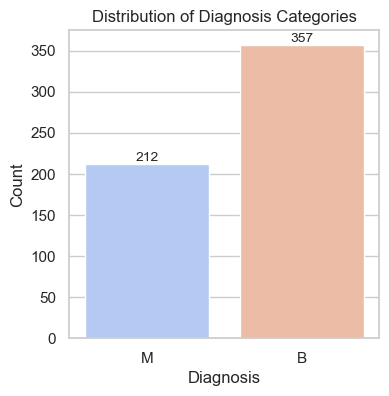

In [70]:
# set the style & context of the plots
sns.set_style('whitegrid')
sns.set_context('notebook')

# plotting the  distribution of the diagnosis categories to understand the proportion of benign vs. malignant cases
plt.figure(figsize = (4,4))
plot = sns.countplot(x = 'diagnosis', data = cancer, palette = 'coolwarm')
plot.bar_label(plot.containers[0], fmt = '%.0f', padding = 0, fontsize = 10)
plt.title('Distribution of Diagnosis Categories')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

- M = malignant / B = benign  
- Benign cases is more than Malignant cases. (357 > 212)

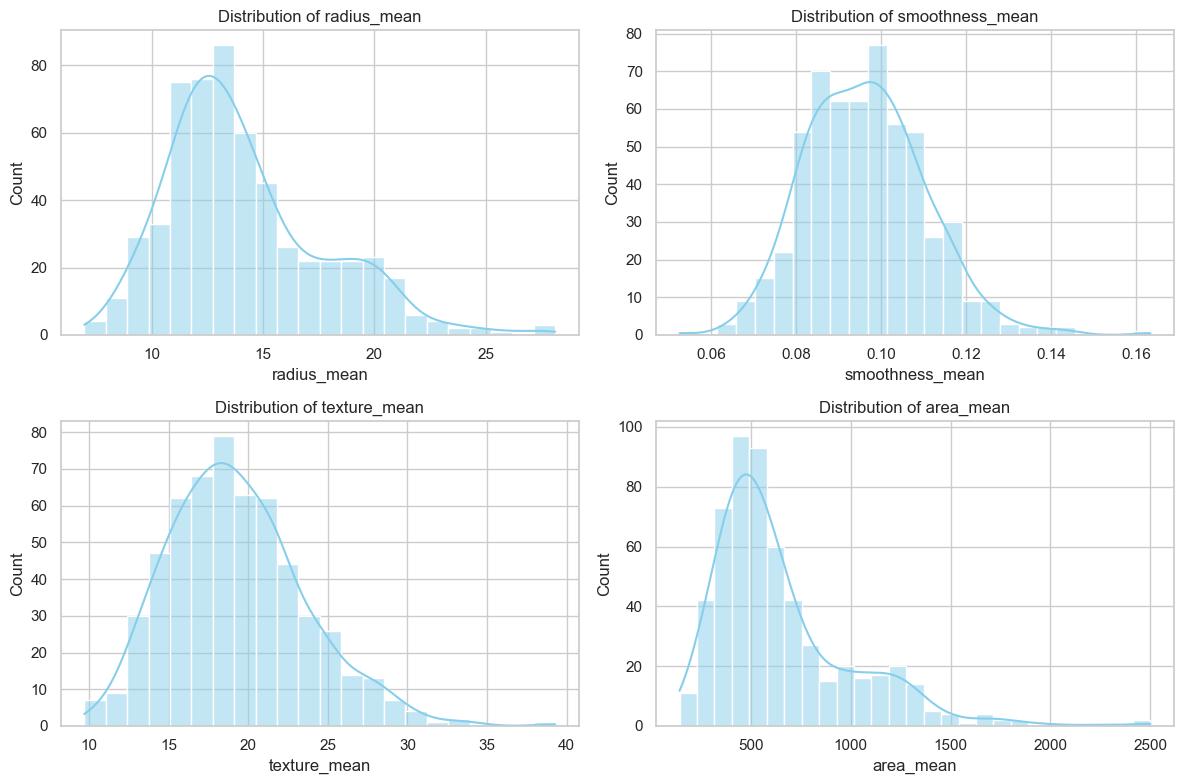

In [78]:
# Selecting a subset of features for histograms
features_to_plot = ['radius_mean', 'smoothness_mean', 'texture_mean', 'area_mean']

# Plotting histograms for a selection of features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(cancer[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

#### Interpretations:
- Radius_mean: The distribution is slightly right-skewed,with a peak around 10-15 units.
- Smoothness_mean: The distribution is more spread out compared to radius_mean, nearly normal.
- Texture_mean: Similar to Smoothness_mean, nearly normal distributed.
- Area_mean: This feature also exhibits a right-skewed distribution, with a concentration of values at the lower end.

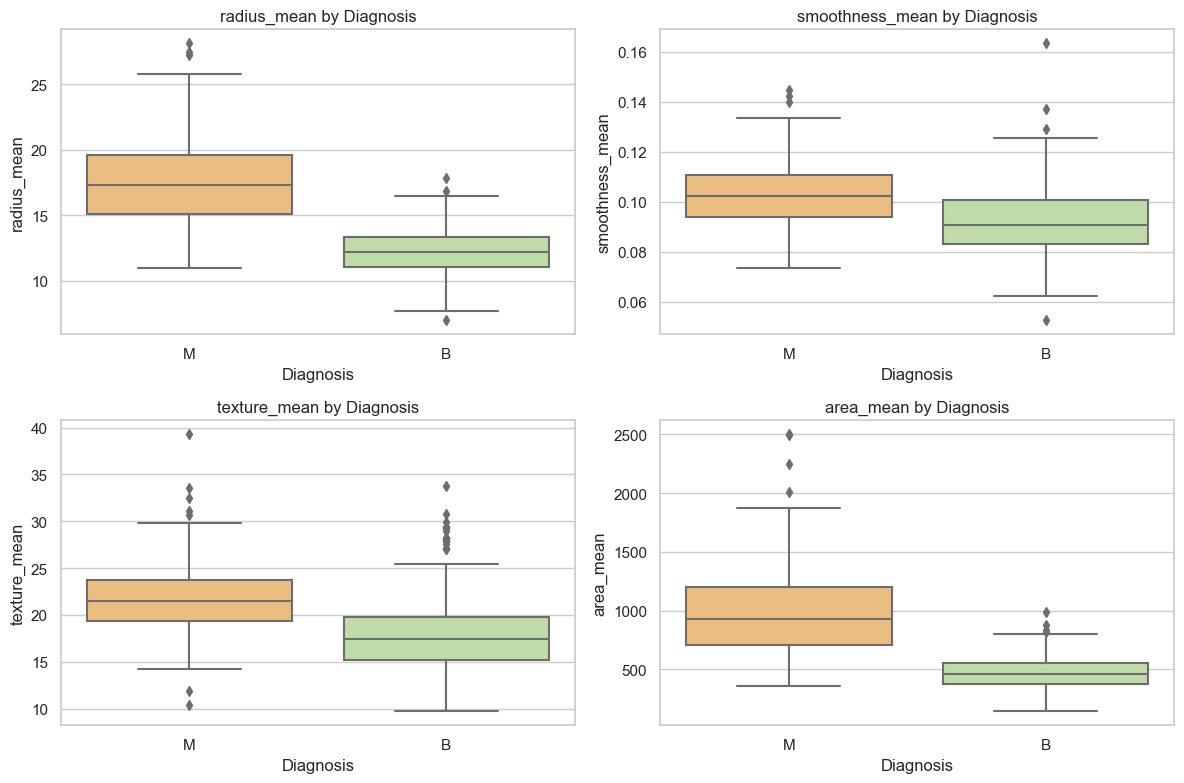

In [81]:
# Plotting box plots for the selected features, grouped by diagnosis
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=cancer, palette="Spectral")
    plt.title(f'{feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

#### Interpretations:
- Radius_mean: Malignant cases have a higher median and wider distribution compared to benign cases, Indicating larger radii are more likely to be associated with malignant tumors.
- Smoothness_mean: Malignant cases have a higher median and similar distribution compared to benign cases.
- Texture_mean: Similar to Smoothness_mean, but have more outliers.
- Area_mean: Malignant cases have a higher median and a significant wider distribution compared to benign cases.

---

### __2. Logistic Regression Model Development:__

#### __2.1 Preprocess the data (handling missing values, encoding categorical variables, etc.)__

In [112]:
# Check for missing values
missing_values = cancer.isnull().sum()
for i in missing_values:
    if i != 0:
        print(i)
    else:
        break
print('No missing values')

No missing values


In [238]:
# Encode the 'diagnosis' column: Malignant (M) as 1 and Benign (B) as 0
cancer.loc[:, 'diagnosis'] = cancer['diagnosis'].map({'M': 1, 'B': 0})
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### __2.2 Develop a logistic regression model to predict whether cancer is malignant or benign__

- As we can tell from the dataset, The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, column 3 is Mean Radius, column 13 is Radius SE, column 23 is Worst Radius.
- However, we don't need to include all of them when building a model, otherwise, it may lead to biased results or a negative R-square. Thus, we only include the 10 original feature variables.

In [239]:
# separate features and target variable
# select only first 10 rows as model's variables
X = cancer.iloc[:, 2:12] 
y = cancer['diagnosis']

# Add a constant term to the features for the intercept
X = sm.add_constant(X)

# Also ensure y is numeric
y = pd.to_numeric(y, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [240]:
# fit the logistic regression model
model_logit = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
# another way: model = sm.Logit(y_train, X_train).fit()

In [241]:
# Display the summary and coefficients of the regression model
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                            GLM   Df Residuals:                      387
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54.475
Date:                Wed, 24 Jan 2024   Deviance:                       108.95
Time:                        16:27:28   Pearson chi2:                     165.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6496
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.1874     14.470     -0.358      0.720     -33.548      23.173
radius_mean               -2.0618      4.105     -0.502      0.615     -10.107       5.984
texture_mean               0.3600      0.070      5.128      0.000       0.222       0.498
perimeter_mean            -0.0608      0.558     -0.109      0.913      -1.154       1.032
area_mean                  0.0363      0.019      1.952      0.051      -0.000       0.073
smoothness_mean           66.6438     36.849      1.809      0.071      -5.578     138.866
compactness_mean         -11.8873     22.122     -0.537      0.591     -55.245      31.470
concavity_mean             4.3400      9.883      0.439      0.661     -15.030      23.710
concave points_mean       99.3818     34.072      2.917      0.004      32.603     166.161
symmetry_mean             18.0024     11.885      1.515      0.130      -5.292      41.296
fractal_dimension_mean   -63.5705    102.332     -0.621      0.534    -264.137     136.996
==========================================================================================
"""

In [177]:
# Making predictions on the test set
predictions = model_logit.predict(X_test)  # These are probabilities

# Converting probabilities to binary outcome
predicted_classes = (predictions > 0.5).astype(int)

---

### __3. Model Evaluation:__

#### __3.1 Evaluate logistic regression model using accuracy__

In [166]:
# Accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9415204678362573


#### Interpretations:
- The accuracy of the model is approximately 94.15%, indicating that the model correctly predicted whether the cancer was malignant or benign for about 94.15% of the cases in the test set, which is relatively high.

#### __3.2 Evaluate logistic regression model using classification report__

In [172]:
# Classification report (includes precision, recall, and F1-score)
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       108
           1       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



#### Interpretations:
- Precision: The model has a precision of 0.95 for benign cases and 0.92 for malignant cases, which are relatively high.
- Recall: The recall is also 0.95 for benign cases and 0.92 for malignant cases, indicating that the model identifies 95% of all actual benign cases and 92% of all actual malignant cases.
- F1-Score: The F1-score suggesting a good balance between precision and recall for both classes.
- The support is the number of actual occurrences of each class in the test set, with 108 benign cases and 63 malignant cases.

#### __3.3 Evaluate logistic regression model using AUC-ROC (Area Under the ROC Curve)__

In [173]:
# AUC-ROC
roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.9905937683715462


#### Interpretations:
- The AUC-ROC score is about 0.991, which is very close to 1, indicating that the model has excellent measure of separability and a high ability to distinguish between benign and malignant cases.

#### Summary:
- To evaluate the model, I didn't use the R^2 or RMSE, because these two methods are traditionally used for regression models, not for a classification model in my case. 
- As for the model itself, it appears to perform very well across all metrics.

---

### __4. Testing Interactions Between Features:__

#### __4.1 Build a linear regression model__

In [183]:
# use linear regression model
model_linear = sm.OLS(y_train, X_train).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     83.77
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           2.10e-90
Time:                        22:58:55   Log-Likelihood:                -46.634
No. Observations:                 398   AIC:                             115.3
Df Residuals:                     387   BIC:                             159.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.7837      0.504     -3.539      0.000      -2.775      -0.793
radius_mean                0.5000      0.155      3.224      0.001       0.195       0.805
texture_mean               0.0208      0.004      5.864      0.000       0.014       0.028
perimeter_mean            -0.0573      0.025     -2.276      0.023      -0.107      -0.008
area_mean                 -0.0010      0.000     -3.543      0.000      -0.002      -0.000
smoothness_mean            1.6649      1.763      0.945      0.345      -1.801       5.130
compactness_mean           0.2984      1.261      0.237      0.813      -2.181       2.778
concavity_mean             0.6708      0.611      1.098      0.273      -0.531       1.872
concave points_mean        8.1321      1.732      4.695      0.000       4.727      11.537
symmetry_mean              0.6046      0.689      0.877      0.381      -0.751       1.960
fractal_dimension_mean    -1.9269      4.993     -0.386      0.700     -11.743       7.889
==============================================================================
Omnibus:                        9.426   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.627
Skew:                           0.381   Prob(JB):                      0.00812
Kurtosis:                       3.024   Cond. No.                     2.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
# Making predictions on the test set
predictions = model_linear.predict(X_test)
predictions

204    0.254510
70     0.783912
131    0.738342
431    0.104328
540    0.031941
         ...   
69     0.196933
542    0.440690
176    0.067374
501    0.618741
247    0.138086
Length: 171, dtype: float64

####  __4.2 Issues when using Linear Regression Model to predict Binary Outcomes__

- __Non-Binary Predictions:__ Linear regression models predict values on a continuous scale, not a binary outcome. Therefore, predicted values can fall outside the range of (0,1), which does not make sense for a probability. Even though it seems does not happened, that might just a coincidence, they are still not true probabilities.
- __Homoscedasticity Violation:__ Linear regression assumes that the variance of the error terms is constant across all levels of the independent variables. However, with a binary outcome, the variance is not constant, and this assumption is violated. This can lead to inefficient estimates and incorrect standard errors. That might account for part of the reason why the R^2 is just 0.684, significantly lower than the former model.
- __Inappropriate Interpretations:__ Linear regression does not produce probabilities without further transformation and the R-squared value is less meaningful under this case. The coefficients for some variables may also be misleading. For instance, the coefficient for radius_mean is 0.5000, but interpreting this as "for each unit increase in radius_mean, the predicted value of diagnosis increases by 0.5" is problematic in a binary outcome setting.
- __Other disobeys and caveats:__ The model's Omnibus test is significant (p < 0.05), indicating that the residuals are not normally distributed, which is another violation of the linear regression assumptions. The Jarque-Bera test is also significant, further indicating that the residuals do not have a normal distribution. Besides, using linear regression might make the model more prone to being influenced by outliers, which can disproportionately affect the regression line and hence the predicted values.

#### __4.3 Create Interaction Terms__

In [190]:
# Create interaction terms involving categorical and continuous variables 
cancer['diagnosis_radius_interaction'] = cancer['diagnosis'] * cancer['radius_mean']
cancer['diagnosis_texture_interaction'] = cancer['diagnosis'] * cancer['texture_mean']

#### __4.4 Fit a regression model that includes interaction terms__

In [209]:
# Define the independent variables (including interaction terms) and the dependent variable
X = cancer[['radius_mean', 'texture_mean', 'diagnosis_radius_interaction', 'diagnosis_texture_interaction']]
y = cancer['diagnosis']  

# Add a constant term for the intercept to the independent variables
X = sm.add_constant(X)

# Convert all columns that should be numeric but are 'object' to numeric
# Check the data types of each column using: cancer.dtypes
y = pd.to_numeric(y, errors = 'coerce')
for i in ['diagnosis_radius_interaction', 'diagnosis_texture_interaction']:
    X[i] = pd.to_numeric(X[i], errors='coerce')
    
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the regression model
model_interaction = sm.OLS(y_train, X_train).fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6072.
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:55:11   Log-Likelihood:                 547.97
No. Observations:                 398   AIC:                            -1086.
Df Residuals:                     393   BIC:                            -1066.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.4246      0.025     17.030      0.000       0.376       0.474
radius_mean                      -0.0238      0.002    -12.891      0.000      -0.027      -0.020
texture_mean                     -0.0072      0.001     -7.828      0.000      -0.009      -0.005
diagnosis_radius_interaction      0.0380      0.002     20.502      0.000       0.034       0.042
diagnosis_texture_interaction     0.0220      0.001     17.151      0.000       0.019       0.025
==============================================================================
Omnibus:                       12.752   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.188
Skew:                          -0.281   Prob(JB):                     0.000185
Kurtosis:                       3.849   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### __4.5 Interpret the model and discuss the influence of the interactions in the model__

- __Interpretation of Interaction Terms:__ The coefficient for diagnosis_radius_interaction is 0.0380, and it's statistically significant (p < 0.001). This suggests that for patients with a malignant diagnosis, an increase in the radius_mean is associated with an increase of 0.0380 units in the predicted value of the dependent variable (which in a binary outcome model would be interpreted as the log-odds of having a malignant tumor in logistic regression). Similarly, the coefficient for diagnosis_texture_interaction is 0.0220 with a p-value < 0.001, implying that the texture has a different impact on the diagnosis if the tumor is malignant. The increase in texture_mean increases the predicted value by 0.0220 units for malignant cases.
- __Interpretation of the model:__ The high R-squared value of 0.984 indicates that the model explains a very high proportion of the variance in the diagnosis. However, as discussed before, since linear regression model is not suitable under our cases, the high R-squared should be interpreted with caution, as it may indicate overfitting.
- __Influence on the Model:__ The presence of significant interaction terms indicates that the effect of radius_mean and texture_mean on the diagnosis is not simply additive but varies depending on whether the diagnosis is benign or malignant.
- __Implications for Understanding the Data:__ When conducting an exploratory analysis to understand the relationships within data, interaction terms can provide insights that may lead to more nuanced conclusions. For example, if medical professionals are using this model, they might infer that the size and texture of a tumor could be more indicative of malignancy in conjunction with other factors, like the diagnosis itself.

---

### __5. Feature Selection and Cross-Validation:__

#### __5.1 Select significant predictors by using FDR Cutoff__

In [242]:
# Extracting p-values from the logistic model
p_values = model_logit.pvalues

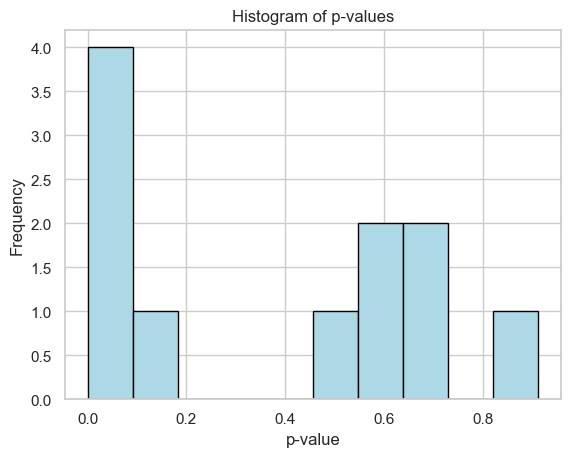

In [243]:
# Plot the histogram of p-values
plt.hist(p_values, color="lightblue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of p-values")
plt.show()

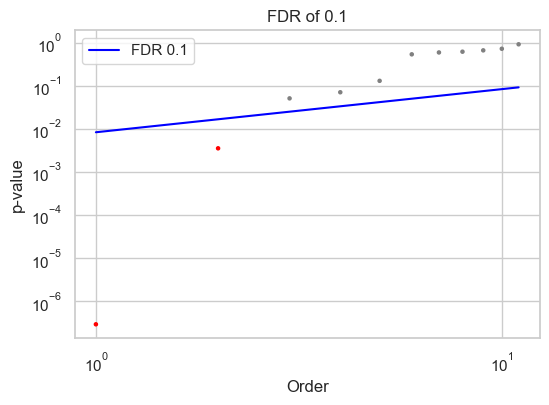

Threshold p-value at 10% FDR: 0.0035


In [244]:
def fdr_cut(pvals, q=0.1):
    # Sort p-values and remove NaNs
    pvals = sorted([p for p in pvals if not pd.isna(p)])
    N = len(pvals)
    k = np.arange(1, N + 1)
    alpha = max(p for p, rank in zip(pvals, k) if p <= q * rank / (N + 1))

    # Plot the p-values
    plt.figure(figsize=(6, 4))
    plt.scatter(k, pvals, c=['gray' if p > alpha else 'red' for p in pvals], s=5)
    plt.plot(k, q * k / (N + 1), color='blue', label=f'FDR {q}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Order")
    plt.ylabel("p-value")
    plt.title(f"FDR of {q}")
    plt.legend()
    plt.show()
    
    return alpha

# Apply the function on the extracted p-values
threshold = fdr_cut(p_values)
print(f"Threshold p-value at 10% FDR: {threshold:.4f}")

In [245]:
# Identify significant predictors based on the threshold p-value
significant_predictors = p_values[p_values <= 0.0035].index.tolist()
significant_predictors

['texture_mean']

#### __5.2 Create a reduced model using only the significant predictors__

In [246]:
# select only significant predictors as model's variables
X_cut = cancer['texture_mean']
y = cancer['diagnosis']

# Add a constant term to the features for the intercept
X_cut = sm.add_constant(X_cut)

# Also ensure y is numeric
y = pd.to_numeric(y, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cut, y, test_size=0.3, random_state=42)

In [247]:
# fit the logistic regression model
model_logit_reduced = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

In [248]:
model_logit_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -227.85
Date:                Wed, 24 Jan 2024   Deviance:                       455.70
Time:                        16:27:48   Pearson chi2:                     406.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1627
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.1333      0.646     -7.940      0.000      -6.400      -3.866
texture_mean     0.2375      0.032      7.311      0.000       0.174       0.301
================================================================================
"""

#### __5.3 Model Comparison using 10-fold cross-validation__

In [269]:
# Set up 10-fold cross-validation
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)

# Initialize the model while Increase the number of iterations
model = LogisticRegression(max_iter=10000)  # Increase the number of iterations


# Evaluate the full model using 10-fold CV
full_model_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  

# Evaluate the reduced model using 10-fold CV
reduced_model_scores = cross_val_score(model, X_cut, y, cv=kf, scoring='accuracy')

# Compare the performance
print(f"Full model CV accuracy: {np.mean(full_model_scores):.3f} (+/- {np.std(full_model_scores):.3f})")
print(f"Reduced model CV accuracy: {np.mean(reduced_model_scores):.3f} (+/- {np.std(reduced_model_scores):.3f})")

Full model CV accuracy: 0.907 (+/- 0.039)
Reduced model CV accuracy: 0.703 (+/- 0.076)


#### Interpretations:
- As we can see from the 10-fold cross-validation results, the accuracy for th Full model is 0.907 with a standard deviation of 0.039, which is far greater than the accuracy for the Reduced model, which is 0.703 with a standard deviation of 0.076. This indicates that the full model is better than the reduced model.

#### __5.4 Model Comparison using Out-of-sample predictions__

In [270]:
model_full = LogisticRegression(max_iter=10000)
model_reduced = LogisticRegression(max_iter=10000)

In [271]:
def cross_validate_model(model, X, y, kf):
    fold_metrics = []

    for train_index, test_index in kf.split(X):
        # Clone the model to ensure each fold gets a fresh model
        clone_model = clone(model)
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        clone_model.fit(X_train, y_train)
        
        # Evaluate the model
        fold_metric = clone_model.score(X_test, y_test)  # or any other appropriate metric
        fold_metrics.append(fold_metric)

    return fold_metrics

# Evaluate models
full_model_metrics = cross_validate_model(model_full, X, y, kf)
reduced_model_metrics = cross_validate_model(model_reduced, X_cut, y, kf)

In [272]:
full_model_mean = np.mean(full_model_metrics)
reduced_model_mean = np.mean(reduced_model_metrics)

print(f"Full Model Average Performance: {full_model_mean}")
print(f"Reduced Model Average Performance: {reduced_model_mean}")

# You can also calculate the standard deviation to understand the variability in the performance
full_model_std = np.std(full_model_metrics)
reduced_model_std = np.std(reduced_model_metrics)

print(f"Full Model Performance Standard Deviation: {full_model_std}")
print(f"Reduced Model Performance Standard Deviation: {reduced_model_std}")

Full Model Average Performance: 0.906829573934837
Reduced Model Average Performance: 0.7029448621553885
Full Model Performance Standard Deviation: 0.039331256354952666
Reduced Model Performance Standard Deviation: 0.07600767151814174


#### Interpretations:
- As we can see from the Out_of_sample prediction results, the full model still performs much better than the reduced model with a higher average performance score. Indicating that the reduced model does not enhancements overall, we should still use the full model.

